In [1]:
import numpy as np
import matplotlib.pyplot as plt

from twoTIC import get_rgba

In [2]:
xx = np.linspace(0, np.pi, 200)
yy = np.linspace(-2, 2, 200)
peaks = np.cos(xx)
intensity = np.exp(-(yy.reshape(200, 1)-peaks.reshape(1, 200))**2)
character = np.array([np.linspace(0, 1.0, 200)]*200)

Text(0.5, 1.0, 'Character')

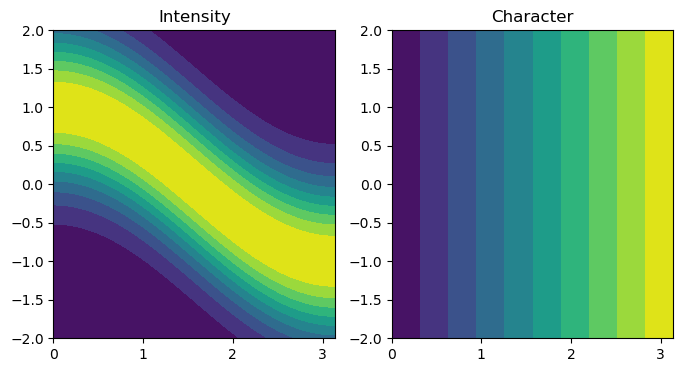

In [3]:
fig, axes = plt.subplots(1,2, figsize=(8, 4))

ax = axes[0]
ax.contourf(xx, yy, intensity, 10)
ax.set_title("Intensity")

ax = axes[1]
ax.contourf(xx, yy, character, 10)
ax.set_title("Character")

If Character only has meaning when Intensity is high, then we can reasonably display both pieces of information in one 2D color plot. We let lightness represent the itensity and hue represent the character. This is implemented by the method get_rgba() using matplotlib's colormap gist_heat as the basis.

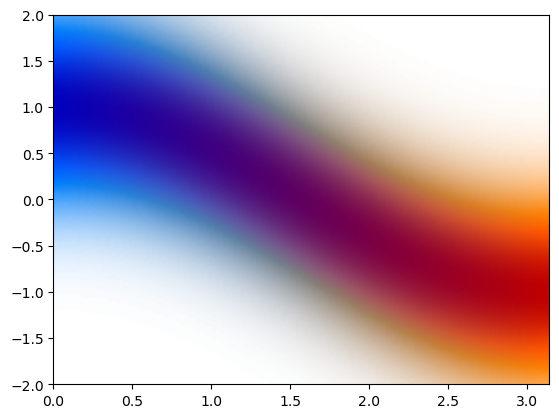

In [15]:
red, blue, rgba = get_rgba(intensity, character, 2*np.max(intensity))
extent = (0, np.pi, -2, 2)

fig, ax = plt.subplots()
ax.imshow(rgba[:,::-1], extent=extent, aspect='auto')

The way this works is to associate two different rgba values to each pixel by mapping intensity to two different colormaps (called 'red' and 'blue' here). The character value of each pixel simply interpolates between the two rgba values.

It is possible to exepriment with using different initial colormaps.

Now, hue is not distinguishable when lightness is close to the extremal points (lightness = 0/1 corresponds to black/white), and hue is most distinguishable when lightness is somewhere in the middle. We take this into account using the third argument data_max. This sets the the itensity value that would correspond to the maximum of the original colormap. By choosing it to be twice the maximum intensity value, we traverse the lower half of the original colormap---corresponding to mid--high lightness values. The correct choice depends on the data at hand.

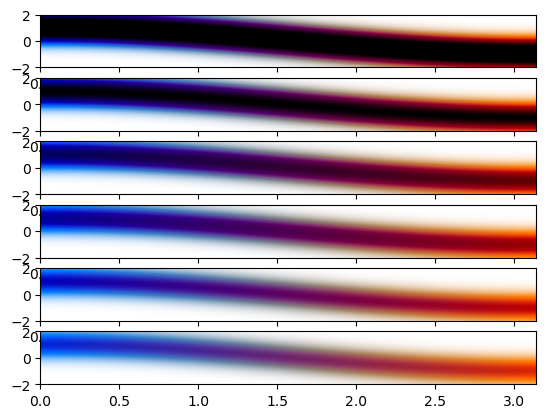

In [27]:
fig, axes = plt.subplots(6)

for i in range(6):
    red, blue, rgba = get_rgba(intensity, character, (2+i)/3*np.max(intensity))
    extent = (0, np.pi, -2, 2)

    ax = axes[i]
    ax.imshow(rgba[:,::-1], extent=extent, aspect='auto')

The third argument implements a power norm to the intensity colormap. That is, it scales the itennsity values by the exponent before mapping to the original colormap. Default is 1.0, corresponding to the linear norm. Can be changed to make the plot look smoother

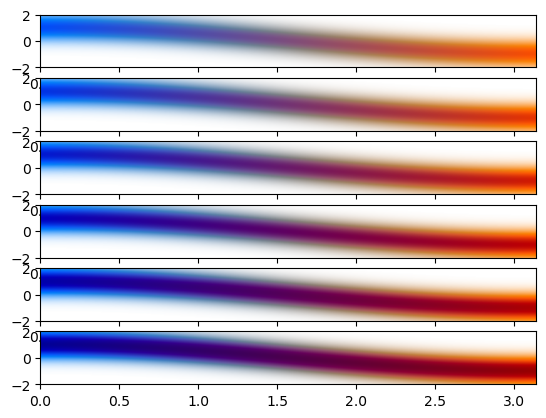

In [28]:
fig, axes = plt.subplots(6)

for i in range(6):
    red, blue, rgba = get_rgba(intensity, character, (2+4)/3*np.max(intensity), 0.7+i/10)
    extent = (0, np.pi, -2, 2)

    ax = axes[i]
    ax.imshow(rgba[:,::-1], extent=extent, aspect='auto')